# Apprendre à utiliser et visualiser un Dataset Synthetic

A la fin de ce workshop vous saurez:

- Adopter un workflow de base avec Github (develop, Verify, Commit)
- Générer un datset synthetic de classification 2D ave cla librairie skleran.
- Visualiser les classes du dataset sur un graphique 2D.
- Visualiser les prédictions de votre réseau de neurones. 

In [1]:
# Importer les librairies utiles
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_classification

In [2]:
# Créer un dataset séparable par une ligne droite en 2D

def split_dataset(X, y, train_pct=0.66):
    """ Va séparer les datasets avec respect pour le pourcentage du dataset à mettre dans le train set.
    Warning: La dimension des exemples doit être la première.
    
    :X mes exemples, shape=(m, -1), m -> dimensions des exemples
    :y mes labels, shape=(m, -1), m -> dimensions des exemples
    :train_pct (default=0.66) Optionnal, c'est un pourcentage qui va séparer le de dataset avec train_pct * total_size dans le train set.
    
    return X_train, y_train, X_test, y_test 
    

    >>> X_train, y_train, X_test, y_test = split_dataset(X, y)
    """
    # 1ere dimension -> celle des exemples
    total_size = X.shape[0]
    
    if y.ndim == 1:
        y = y.reshape(-1, 1)
    
    # On récupère `train_pct` % du dataset pour le train set, aussi il faut convertir en entier pour numpy ...
    train_size = int(train_pct * total_size)
    # ... et on met le reste danss le test set
    test_size  = total_size - train_size 
    
    # On met les `train_size` premier exemples/labels dans le train set ...
    X_train, y_train = (X[:train_size], y[:train_size])
    # ... et les test_size derniers exemples/labels dans le test set.
    X_test , y_test  = (X[-test_size:], y[-test_size:])

    # On s'assure que tous les exemples soient présents dans le test set ou le train set.
    assert X_test.shape[0] + X_train.shape[0] == total_size
    assert y_test.shape[0] + y_train.shape[0] == total_size
    
    return X_train, y_train, X_test, y_test 


In [3]:
# Refactoriser plot_dataset

def plot_dataset(X, y):
    """ Permet d'afficher les classes `y` d'exemples à 2 features `X`
    Warning: La dimension des exemples doit être la première.
    
    Soit m, le nombre d'exemples.
    
    X, matrices d'exemples, deux features par exemple; shape=(m, 2)
    y, matrices de labels, shape=(m, 1)
    
    return: None
    """
    
    plt.scatter(X[:, 0], X[:, 1],
               c=y[:, 0],
               cmap=plt.cm.jet) 
    return None


## Créer un dataset  linéairement séparable

Création d'un dataset de classificationn en 2D avec la fonction make_classification du module sklearn

In [7]:
# On fixe le nombre d'example total par dataset à SAMPLE_SIZE
SAMPLE_SIZE = 200

# On créé le dataset séparable lineairement
X, y = make_classification(n_samples=SAMPLE_SIZE,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1)

# On split le dataset en set de training et de test.
X_train, y_train, X_test, y_test = split_dataset(X, y)

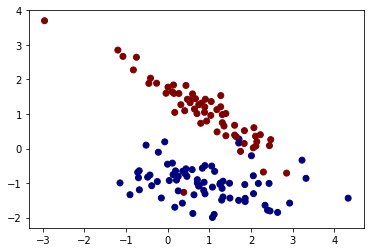

In [8]:
# On affiche le dataset
plot_dataset(X_train, y_train)

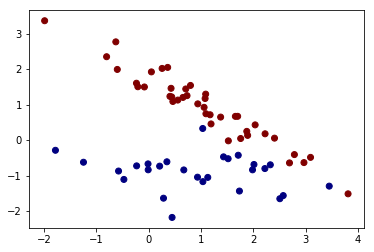

In [9]:
plot_dataset(X_test, y_test)